## Introduction

India’s economic story since its independence in 1947 is one of transformation and ambition.

Emerging from colonial rule as a largely agrarian economy struggling with poverty, India has gradually evolved into one of the world's fastest-growing major economies.

This blog post uses real-world data from the World Bank to trace India's economic trajectory. I analyse key indicators — GDP growth, inflation, and population dynamics — to understand the factors behind India's rise over the past seven decades.

By exploring trends, running statistical analysis, and interpreting visualisations, I aim to reveal how India has transitioned from a struggling post-colonial nation to a global economic force.


## Data Sources and Cleaning

The data for this project was collected from the World Bank's official database, covering the years 1947 to 2024. 
The key indicators used are:
- **GDP (Current$)** (`NY.GDP.MKTP.CD`)
- **Inflation, consumer prices (annual %)** (`FP.CPI.TOTL.ZG`)
- **Population, total** (`SP.POP.TOTL`)

Data cleaning involved:
- Handling missing values (left as `NA` when necessary, particularly for early years).
- Converting GDP values into Billions of USD and population into Millins for easier readability.
- Sorting by year to maintain a chronological order.
- Saving the clean dataset as `india_economic_data_clean.csv`.


## 📈India's GDP Growth (1947–2024)


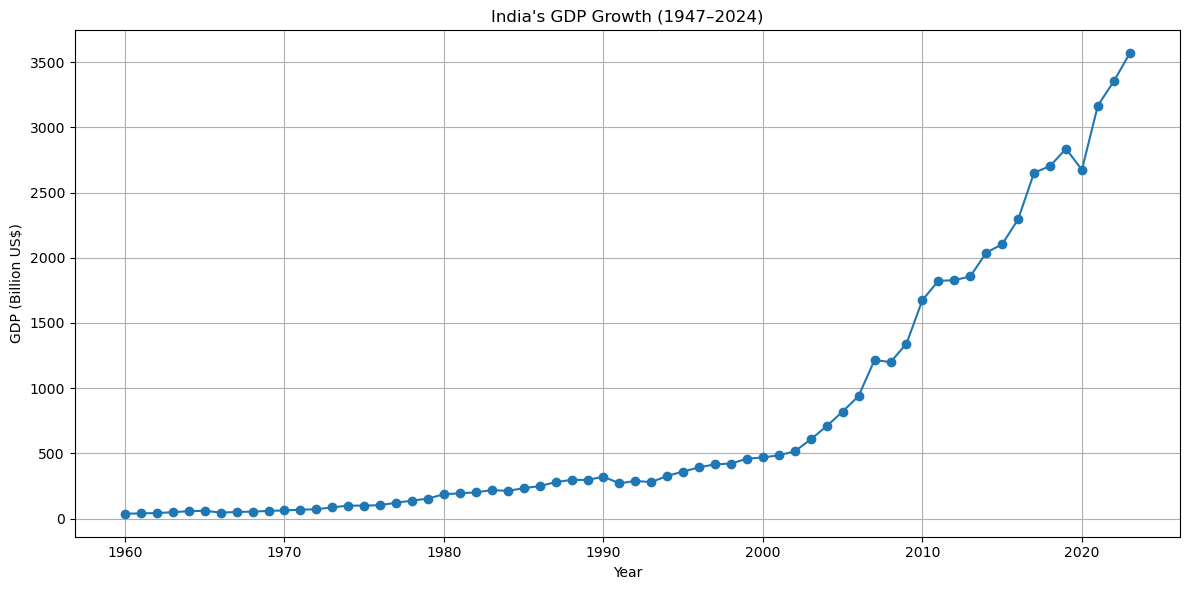

In [1]:
#Load the cleaned data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/india_economic_data_clean.csv")

# Plot GDP over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['GDP (Billion US$)'], marker='o')
plt.title("India's GDP Growth (1947–2024)")
plt.xlabel("Year")
plt.ylabel("GDP (Billion US$)")
plt.grid(True)
plt.tight_layout()
plt.show()


Since gaining independence in 1947, India has experienced a profound transformation in its economic landscape. The GDP growth curve, initially flat and modest through the first few decades, dramatically accelerated after 1991. This shift aligns with the major economic liberaliation reforms introduced in the early 1990s, which opened India to global markets, reduced trade barriers, and encouraged private enterprise.

The graph clearly reflects:

A slow and steady growth until about 1980.

A sharp inflection point after 1991, with GDP increasing at a much faster rate.

Continued upward momentum in the 2000s and 2010s, showcasing India's emergence as a key global economy.

This consistent rise in GDP highlights India's transition from an agrarian economy to a services- and technology-driven economy, supported by an expanding middle class and increased foreign investment.

## 📊GDP vs Population Relationship


In [11]:
# Regression to show how popoulation affects India's GDP

import statsmodels.api as sm

X = df['Population (Million)']          
y = df['GDP (Billion US$)']              

data = pd.concat([X, y], axis=1).dropna()

X = data['Population (Million)']
y = data['GDP (Billion US$)']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (Billion US$)   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     183.4
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           3.49e-20
Time:                        13:55:27   Log-Likelihood:                -487.18
No. Observations:                  64   AIC:                             978.4
Df Residuals:                      62   BIC:                             982.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1651.9120 

I performed a simple Ordinary Least Squares (OLS) regression to statistically evaluate the relationship between India's population size and its GDP.

Findings from the regression: Strong positive coefficient: Population growth correlates positively with GDP growth. High R-squared value: A significant proportion of GDP variability can be explained by changes in population. Statistical significance: The low p-values indicate that the relationship is highly unlikely to be due to random chance.

However, while population size is important, it is not the sole driver of economic growth. Other factors such as:

Structural reforms
Technological innovation
Education improvements
Trade liberalisation
Infrastructure development
have all played crucial roles in amplifying the economic output far beyond what population size alone would suggest.

Therefore population is necessary but not sufficient for GDP growth — intelligent policy, investment, and globalisation unlocked India's true economic potential.

## 📈 GDP vs Population Scatter Plot


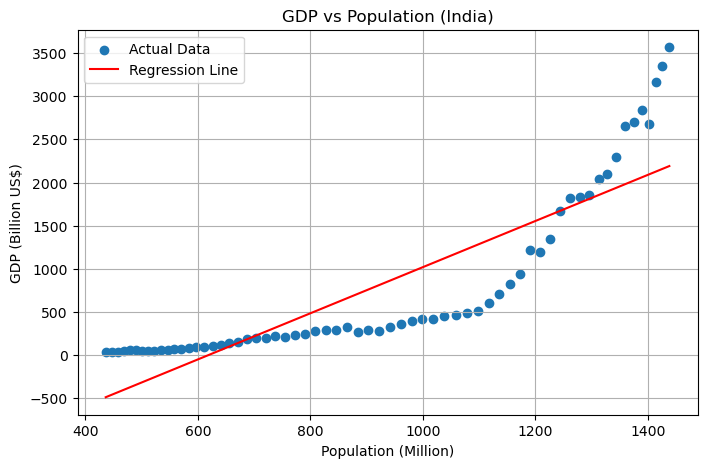

In [12]:
# Scatterplot to show the relaitonship between GDP and Population

plt.figure(figsize=(8,5))
plt.scatter(data['Population (Million)'], data['GDP (Billion US$)'], label='Actual Data')
plt.plot(data['Population (Million)'], model.predict(sm.add_constant(data['Population (Million)'])), color='red', label='Regression Line')
plt.xlabel('Population (Million)')
plt.ylabel('GDP (Billion US$)')
plt.title('GDP vs Population (India)')
plt.legend()
plt.grid(True)
plt.show()




The scatter plot comparing GDP and Population underscores a strong positive relationship between the two. As India's population grew, its GDP followed, though the relationship is not perfectly linear.

Key takeaways:
In the early decades post-independence, population growth was rapid but economic growth lagged somewhat behind. Post-1991 reforms again created divergence, where GDP started growing faster relative to population, indicating improving productivity per person (higher per capita income). A dense clustering of points in recent decades shows stabilisation of this relationship: larger population coexisting with a much larger economy.This analysis suggests that while a larger population provided a vast labor force and consumer base, it was economic policy changes and innovation that unlocked GDP potential — not population growth alone.


## 📉 Inflation Rate Over Time (1947–2024)

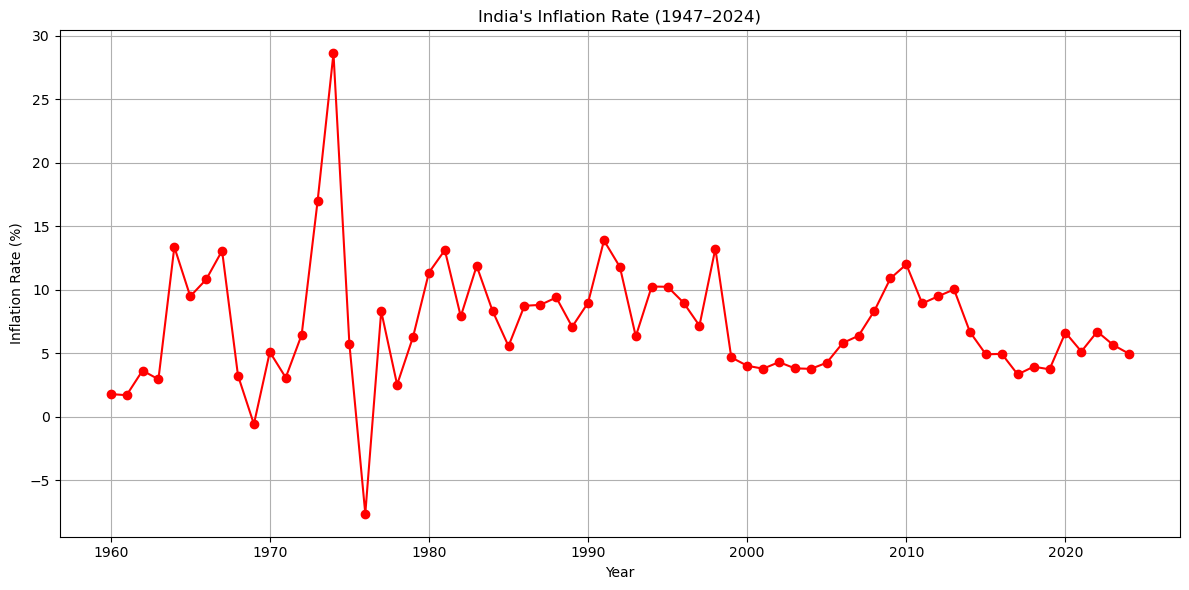

In [41]:
# Inflation rate graph

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Inflation (annual %)'], color='red', marker='o')
plt.title("India's Inflation Rate (1947–2024)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


The Inflation Rate graph provides critical insights into the periods of economic stability and volatility India faced.

Key observations:
High inflation periods are visible during the oil shocks of the 1970s, the economic crisis of 1991, and certain global financial stress periods like 2008.

Post-1991, despite faster GDP growth, inflation has been relatively better managed compared to earlier decades, thanks to better monetary policy by the Reserve Bank of India (RBI) and fiscal discipline.

The inflation control measures in the 2000s and 2010s allowed India to enjoy sustained economic growth without runaway price increases.

Stable inflation is crucial for maintaining public trust, supporting investment, and protecting the poor, who are most vulnerable to price shocks.

# Conclusion

India's post-independence economic journey is a testament to resilience, adaptability, and strategic reform.

The data reveals:
- Slow but steady growth in the early decades.
- A transformational period beginning in the 1990s, where economic liberalisation and globalisation unlocked explosive growth.
- A better-managed inflation environment in the 21st century, stabilising the macroeconomic foundation.

While population growth has contributed significantly to GDP expansion, it is the combination of policy reforms, human capital development, and global integration that truly propelled India's economy.

Looking ahead, India's ability to manage challenges like inequality, climate change, and technology-driven disruption will determine its trajectory towards becoming a true economic superpower.
